## **RNN**

**RNNs** are a type of neural network that can be used to model sequence data.

All of the inputs and outputs in standard neural networks are independent of one another.

RNN was created, which used a Hidden Layer to overcome the problem to remembered the sequencial data. The most important component of RNN is the **Hidden state**, which remembers specific information about a sequence.

The main and most important feature of RNN is its **Hidden state**, which remembers some information about a sequence. The state is also referred to as Memory State since it remembers the previous input to the network.

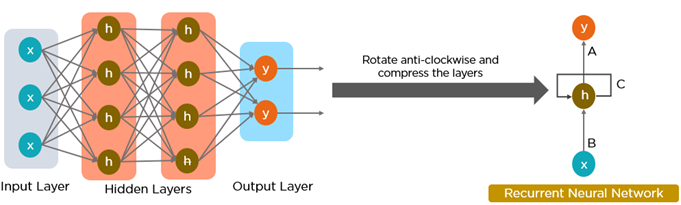


Recurrent neural networks (RNNs) set themselves apart from other neural networks with their unique capabilities:

**Internal Memory:** This is the key feature of RNNs. It allows them to remember past inputs and use that context when processing new information.

**Sequential Data Processing:** Because of their memory, RNNs are exceptional at handling sequential data where the order of elements matters.

**Contextual Understanding:** RNNs can analyze the current input in relation to what they’ve “seen” before. This contextual understanding is crucial for tasks where meaning depends on prior information.

In **ANN**, information flows only in forward direction from the input nodes, through the hidden layers and to the output nodes. There are no **cycles or loops** in the network.

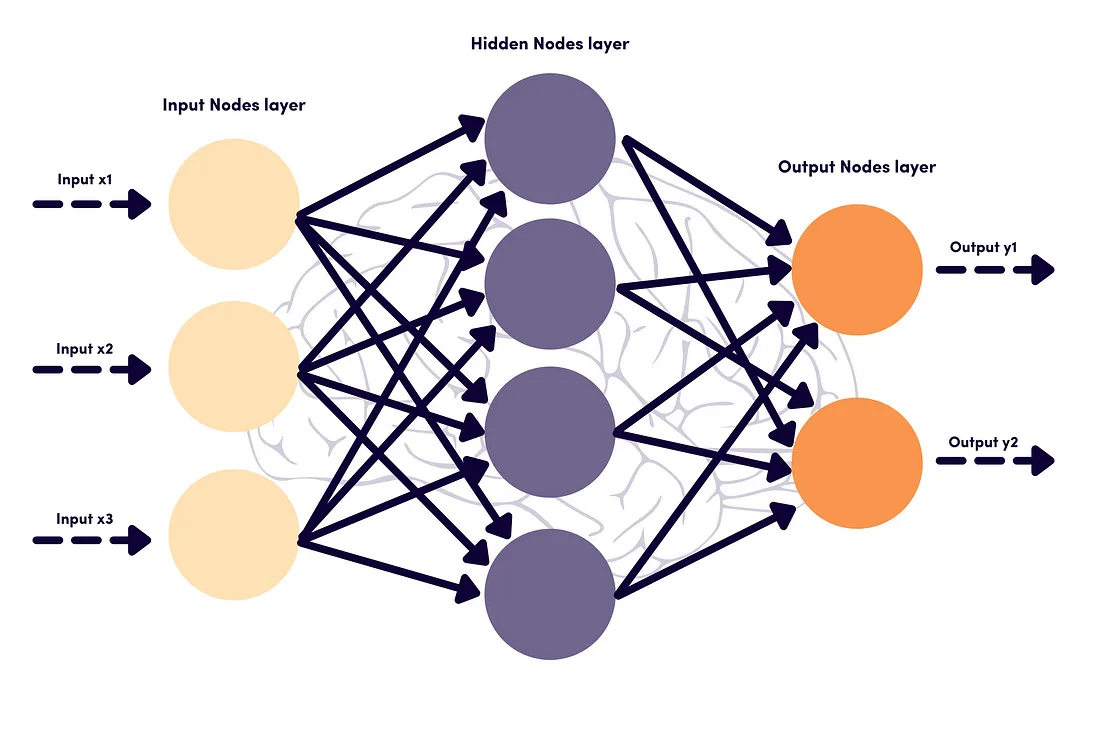

**Issues in the feed forward neural network : -**

Can’t handle sequential data.

Consider only current input.

Can’t memorize the previous input.

**RNNs are different than the classical multi-layer perceptron (MLP) networks because of two main reasons:**

1- They take into account what happened previously 

2- they share parameters/weights.

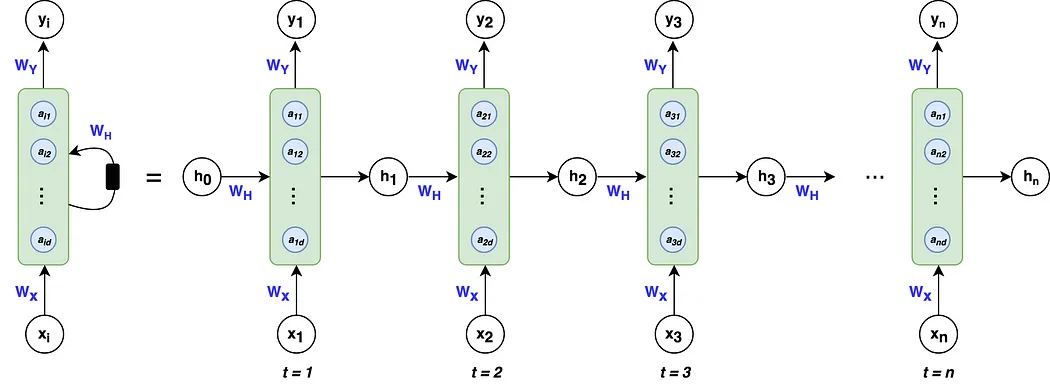

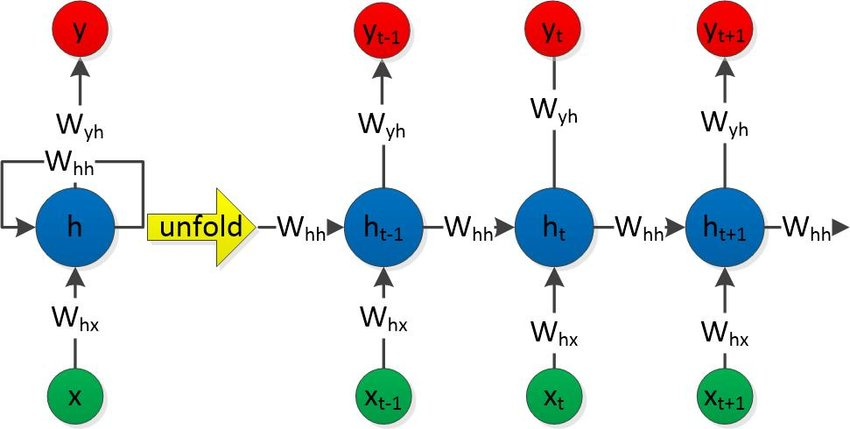



Let’s see how the above structure be used to predict the fifth letter in the word “hello”
if at time t, the input is “e”, at time t-1, the input was “h”.

The formula for the current state can be written as –

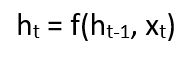

**Ht** is the new state, **ht-1** is the previous state while **xt** is the current input.

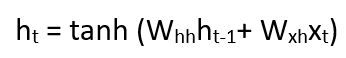

once the current state is calculated we can calculate the output state as-

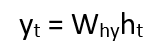

**Forward Propagation in a Recurrent Neuron in Excel**

Let’s take a look at the inputs first-

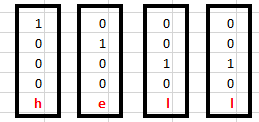

Now the input neuron would transform the input to the **hidden state** using the **weight wxh**

We have randomly initialized the weights as a 3*4 matrix –

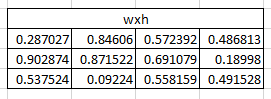

**Step 1:**

Now for the letter **“h”**, for the the hidden state we would need **Wxh*Xt**.
By matrix multiplication, we get it as –

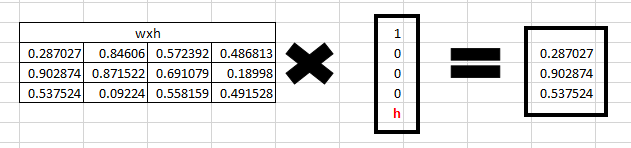

**Step 2:**

Now moving to the recurrent neuron, we have **Whh** as the weight which is a 1*1 matrix as 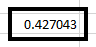  and the bias which is also a 1*1 matrix as 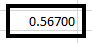

For the letter **“h”**, the previous state is [0,0,0] since there is no letter prior to it.

So to calculate ->  **(whh*ht-1+bias)**

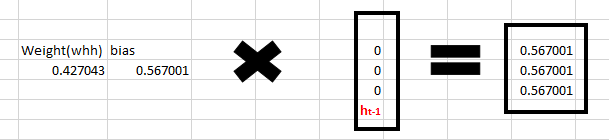

**Step 3:**

Now we can get the current state as –

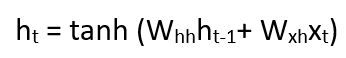

Since for h, there is no previous hidden state we apply the **tanh** function to this output and get the current state –

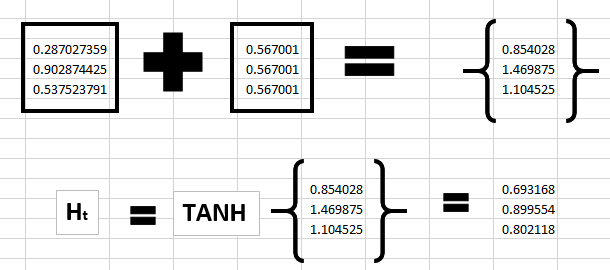

**Step 4:**

Now we go on to the next state. **“e”** is now supplied to the network. The processed output of **ht**, now becomes **ht-1**, while the one hot encoded **e**, is **xt**. Let’s now calculate the current state **ht**.

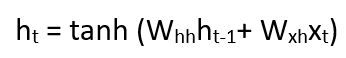

**Whh*ht-1 +bias** will be –

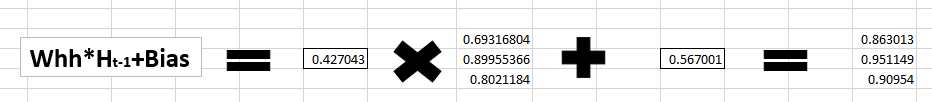

**Wxh*xt** will be –

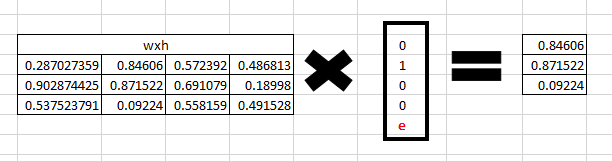

**Step 5:**



Now calculating ht for the letter **“e”**,

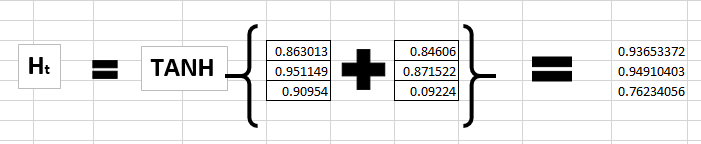

Now this would become **ht-1** for the next state and the recurrent neuron would use this along with the new character to predict the next one.

**Step 6:**

At each state, the recurrent neural network would produce the output as well. Let’s calculate **yt** for the letter **e**.

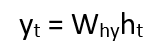

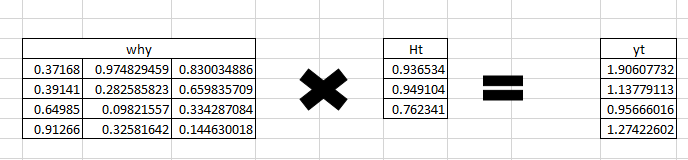 

**Step 7:**

The probability for a particular letter from the vocabulary can be calculated by applying the softmax function. so we shall have **softmax(yt)**

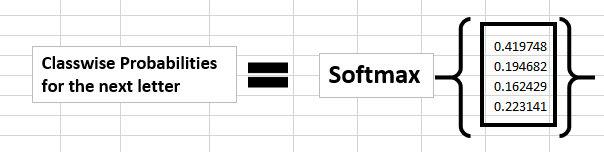

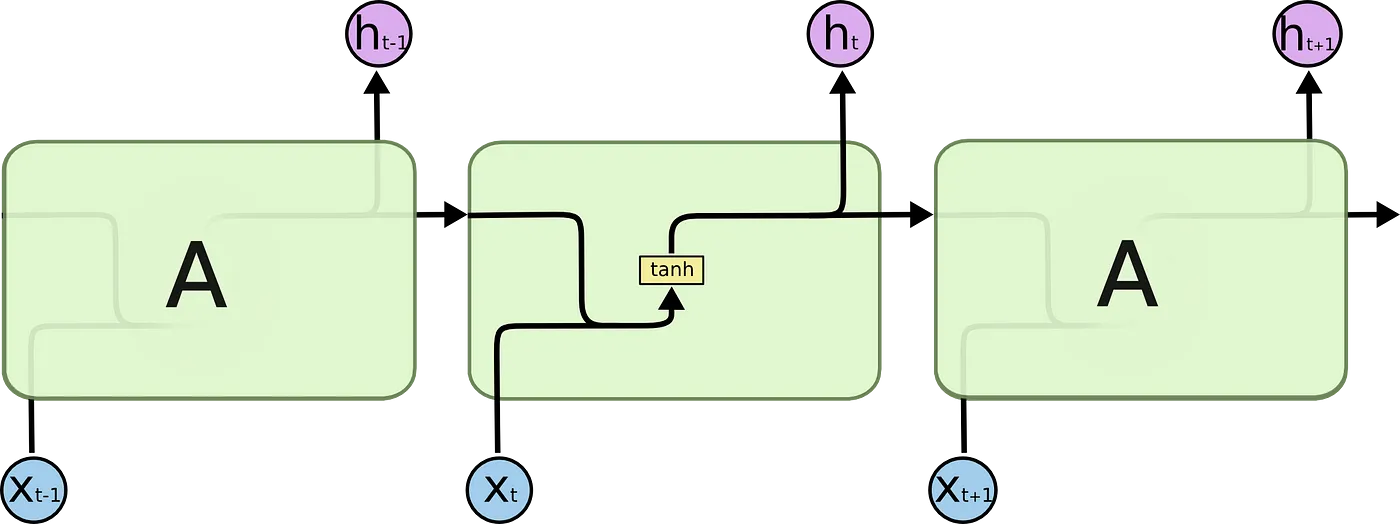

https://medium.com/@praveenraj.gowd/understanding-recurrent-neural-networks-rnn-nlp-e2f4cae03a4f

https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/

Regular RNNs might have a difficulty in learning long range dependencies. For instance if we have a sentence like “The man who ate my pizza has purple hair”. In this case, the description purple hair is for the man and not the pizza. So this is a long dependency.

If we backpropagate the error in this case, we would need to apply the chain rule. To calculate the error after the third time step with respect to the first one –

∂E/∂W = ∂E/∂y3 *∂y3/∂h3 *∂h3/∂y2 *∂y2/∂h1 

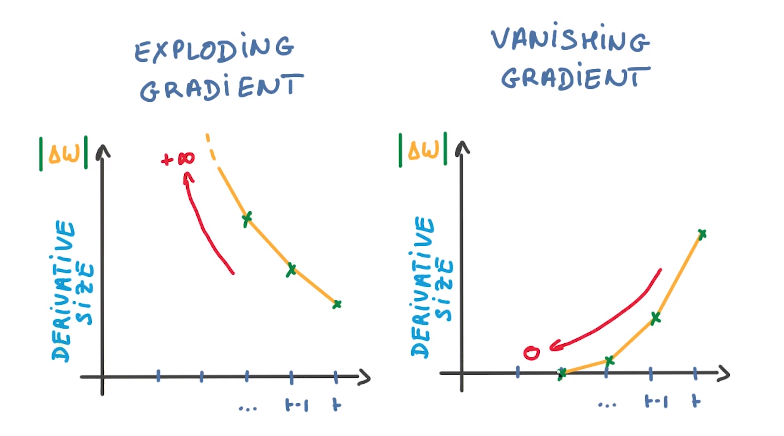

The reason why Vanishing gradient problem is more concerning is that an exploding gradient problem can be easily solved by ***clipping the gradients at a predefined threshold value.***

There are architectures like the ***LSTM(Long Short term memory)*** and the ***GRU(Gated Recurrent Units)*** which can be used to deal with the vanishing gradient problem.

 BOW, Word2Vec these requires fixed input length which is solved by RNN

## **LSTM**

In LSTMs, instead of just a simple network with a single activation function, we have multiple components, giving power to the network to **forget and remember** information.

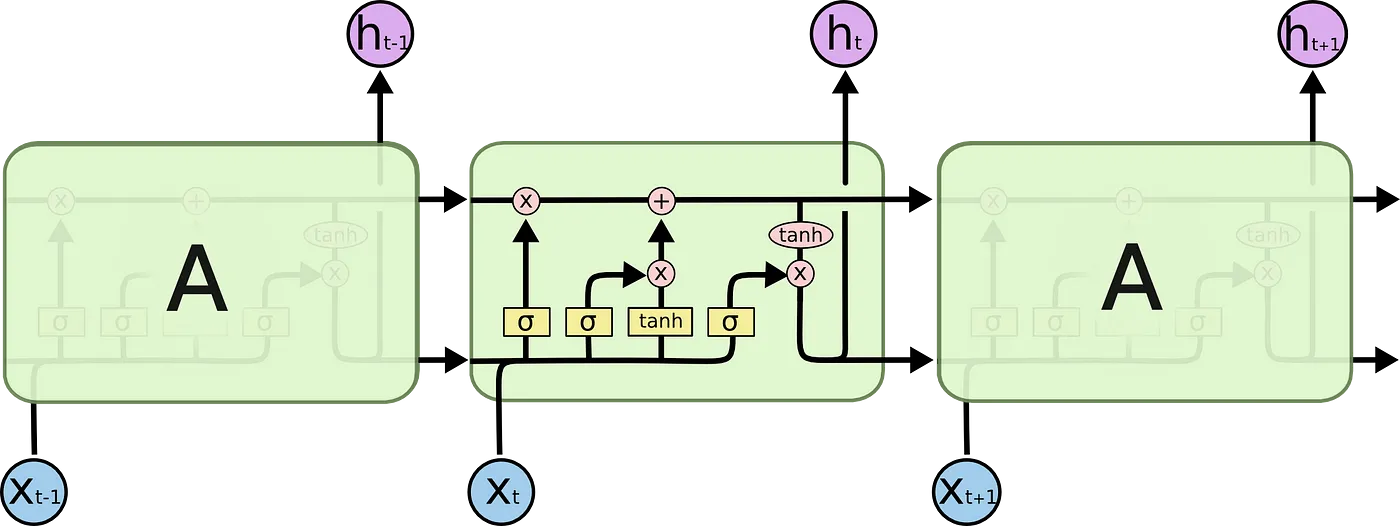

LSTMs have 4 different components, namely

**1-Cell state (Memory cell)**

**2-Forget gate**

**3-Input gate**

**4-Output gate**

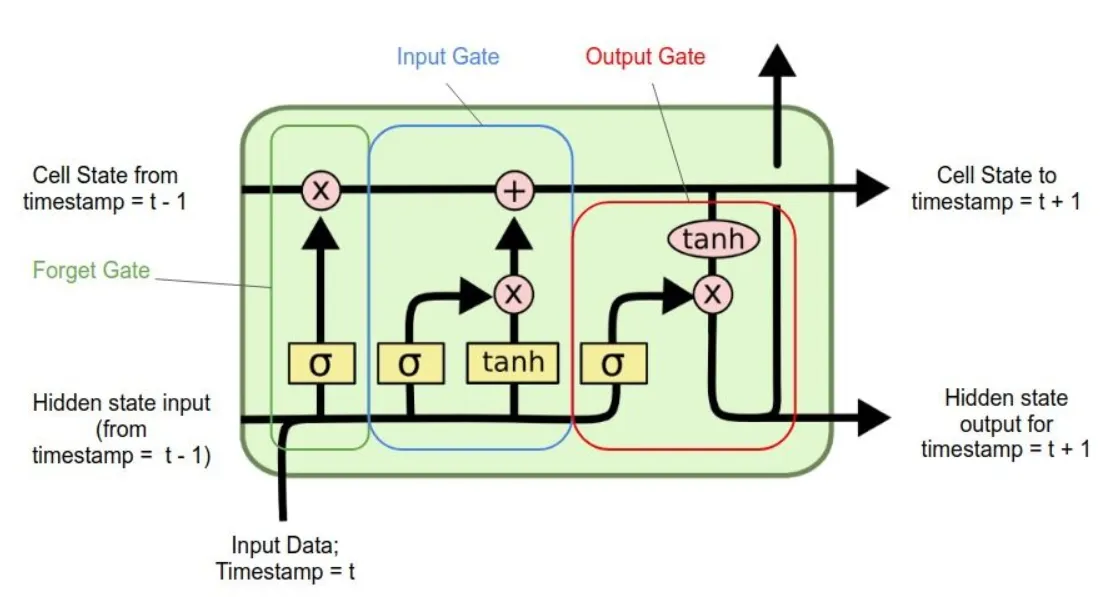

### **1. Cell State (Memory cell)**

It is the first component of LSTM which runs through the entire LSTM unit. It kind of can be thought of as a conveyer belt.
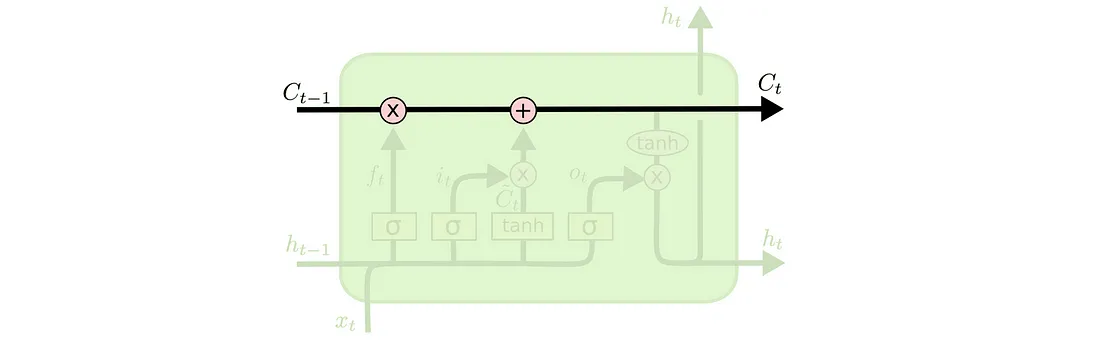

This cell state is responsible for **remembering and forgetting**. This is based on the context of the input. This means that some of the previous information should be remembered while some of them should be forgotten and some of the new information should be added to the memory.

The **first operation (X)** is the pointwise operation which is nothing but **multiplying the cell state** by an array of [-1, 0, 1].

The information **multiplied by 0 will be forgotten by the LSTM**. Another operation is **(+)** which is responsible to add some new information to the state.

### **2. Forget Gate**

The forget LSTM gate, as the name suggests, decides what information should be forgotten. A **sigmoid layer** is used to make this decision. This sigmoid layer is called the “forget gate layer”.

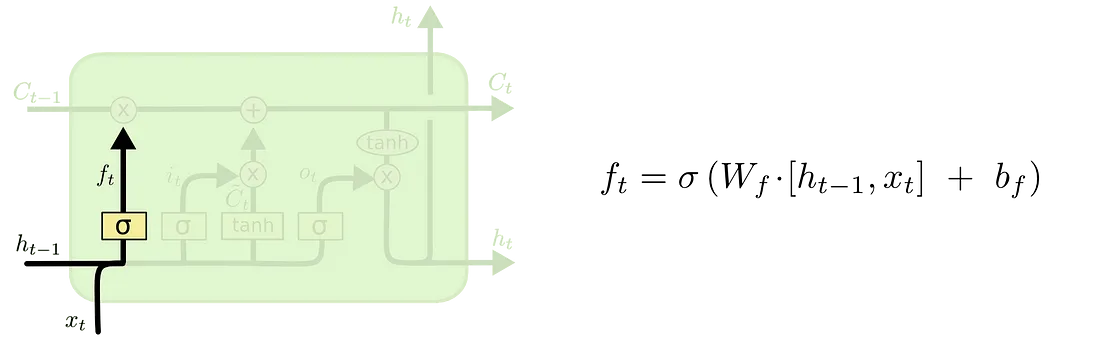

It does a **dot product** of **h(t-1)** and **x(t)** and with the help of the sigmoid layer, outputs a number between 0 and 1 for each number in the cell state C(t-1). If the output is a ‘1’, it means we will keep it. A ‘0’ means to forget it completely.

### **3. Input gate**

The input gate gives new information to the LSTM and decides if that new information is going to be stored in the cell state.

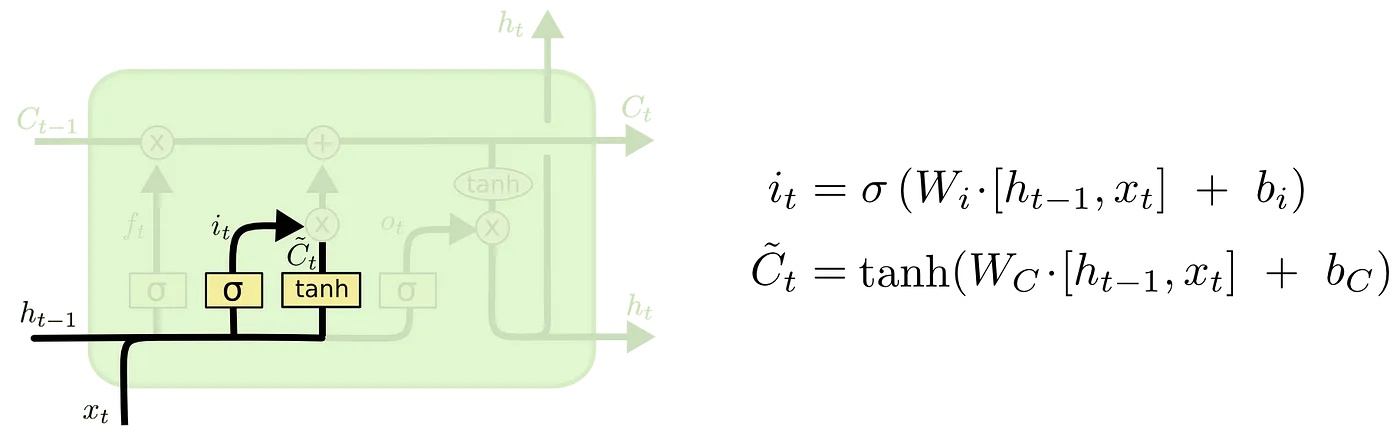

***This has 3 parts-***

A ***sigmoid layer*** decides the values to be updated. This layer is called the ***“input gate layer”***.

A ***tanh activation function*** layer creates a vector of new candidate values, ***Č(t)***, that could be added to the state.

Then we combine these 2 outputs, ***i(t) * Č(t)***, and update the cell state.

The **new cell state C(t)** is obtained by adding the output from forget and input gates.

### **4. Output gate**

The output of the LSTM unit depends on the new cell state.

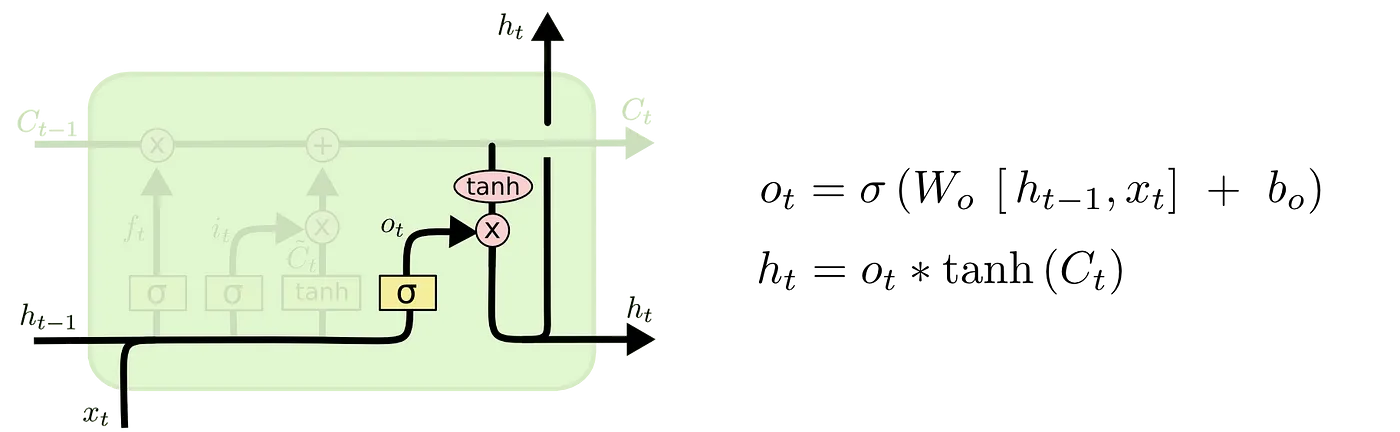

First, a sigmoid layer decides what parts of the cell state we’re going to output. Then, a **tanh layer** is used on the **cell state** to squash the values between -1 and 1, which is finally multiplied by the sigmoid gate output

https://medium.com/analytics-vidhya/introduction-to-long-short-term-memory-lstm-a8052cd0d4cd

## **SEQ TO SEQ MODEL**

Sequence Modelling problems refer to the problems where either the input and/or the output is a sequence of data (words, letters…etc.)

The Sequence-to-Sequence (Seq2Seq) model is a popular architecture used for tasks where the input and output sequences can have different lengths, such as machine translation, text summarization, and conversational agents.

The model consists of two main components: an encoder and a decoder.

**1. Encoder:**

The encoder processes the input sequence (e.g., a sentence in English) and encodes it into a fixed-length vector, often referred to as the ***context vector*** or ***thought vector***. This vector is a summary of the entire input sequence and is passed to the decoder.

**2. Decoder:**

The decoder takes the context vector produced by the encoder and generates the output sequence (e.g., a sentence in French) one token at a time. The decoder produces the output sequentially, with each token being generated based on the context vector and the previously generated tokens.

**Mathematical Formulation:**

***Encoder:***

Let's say the input sequence is 𝑋=(𝑥1,𝑥2,…,𝑥𝑇) ,where 𝑥𝑡 represents the input at time step t, and the sequence length is 𝑇.

The encoder is typically implemented as an RNN, LSTM, or GRU. The hidden state of the encoder at time step 𝑡 is updated as follows:

***ht=ϕ(Wx⋅xt+Wh⋅ht−1+bh)***

Where:

𝑊𝑥 : Weight matrix for the input.

𝑊ℎ : Weight matrix for the previous hidden state.

𝑏ℎ : Bias term.

𝜙  : Activation function (like tanh or ReLU).

ℎ𝑡  : Hidden state at time step 𝑡.

ℎ𝑡−1: Hidden state from the previous time step.

The final hidden state ℎ𝑇 of the encoder (after processing the entire input sequence) is often referred to as the context vector 𝑐:

***c=hT***
​

This context vector 𝑐 summarizes the entire input sequence and is passed to the decoder.

***Decoder:***

The decoder generates the output sequence 𝑌=(𝑦1,𝑦2,…,𝑦𝑇′), where 𝑦𝑡′ represents the output at time step 𝑡′, and the sequence length is 𝑇′.

The decoder is also typically implemented as an RNN, LSTM, or GRU. At each time step 𝑡′, the decoder generates the hidden state 𝑠𝑡′ as follows:
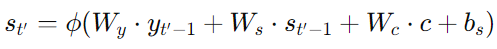

𝑊𝑦 : Weight matrix for the previous output 𝑦𝑡′−1.

𝑊𝑠: Weight matrix for the previous hidden state 𝑠𝑡′−1.

𝑊𝑐: Weight matrix for the context vector 𝑐.

𝑏𝑠 : Bias term.

𝑠𝑡′: Hidden state of the decoder at time step 𝑡′.

𝑦𝑡′−1: The output from the previous time step (or a special start-of-sequence token at the first time step).

The actual output 𝑦𝑡′ is generated by passing the hidden state 𝑠𝑡′ through an output layer (often a softmax layer):

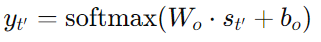

Where:

𝑊𝑜: Weight matrix for the output layer.

𝑏𝑜: Bias term for the output layer.

The softmax function converts the logits into probabilities, and the output token with the highest probability is selected as 𝑦𝑡′.